### Experiment Conducted for the University of São Paulo Postgraduate Class EAD6034 - Time Series Econometrics (2023)

##### Prof. Dr. Leandro dos Santos Maciel

##### Main Imports

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Full Sampled Series

<AxesSubplot: xlabel='TIME'>

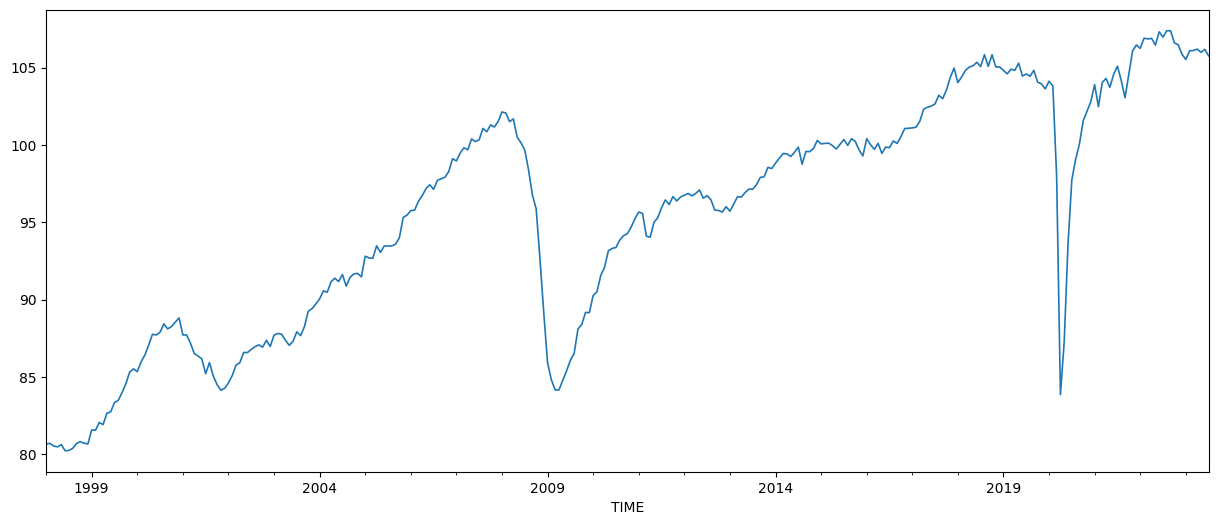

In [35]:
raw_industrial = pd.read_excel(r'OECD_Industrial.xlsx', index_col=0)
raw_industrial.index = pd.to_datetime(raw_industrial.index)

raw_industrial.plot(figsize=(15,6), legend=False,  linewidth=1.2)



#### Division of the Dataset in/out-of-sample

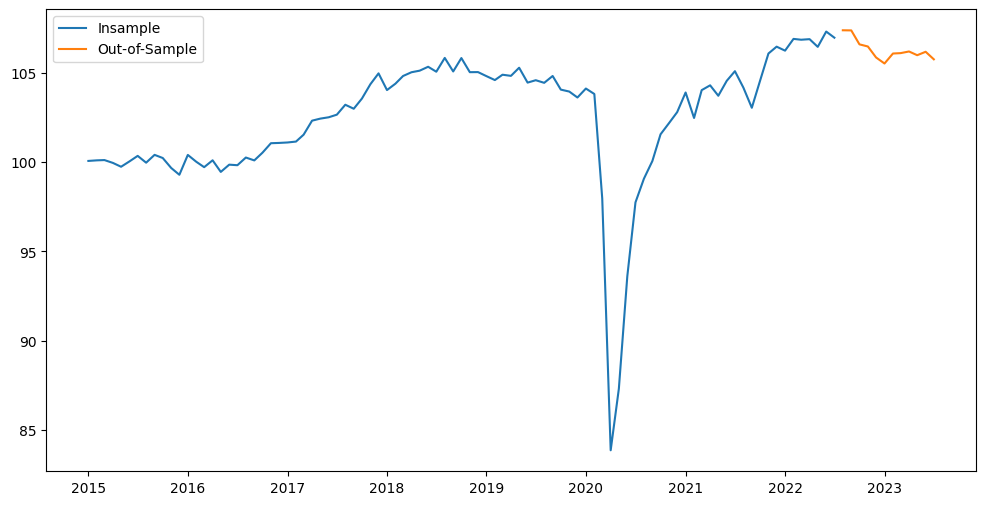

In [36]:
industrial = raw_industrial['2014':]
insample = industrial['2015':'2022-07']
outsample = industrial['2022-08':]

plt.figure(figsize=(12,6))
plt.plot(insample,  linewidth=1.5, label='Insample')
plt.plot(outsample,  linewidth=1.5, label='Out-of-Sample')
plt.legend()
# plt.tight_layout()

## ARIMA

#### Stationarity Tests

##### ADF Test:

In [37]:
from utils import adf_test

adf_test(insample)

-------------None--------------
ADF Statistic:0.3015522780558291
p-value: 0.7752849631960554
Used Lags: 2
Critical Values: {'1%': -2.5916151807851238, '5%': -1.944440985689801, '10%': -1.614115063626972}
--> Non-Stationary
-------------Constant--------------
ADF Statistic:-3.511796282121973
p-value: 0.007689258682755041
Used Lags: 1
Critical Values: {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}
--> Stationary
-------------Constant/Trend--------------
ADF Statistic:-3.7909808468830066
p-value: 0.01702279789012964
Used Lags: 1
Critical Values: {'1%': -4.064269464657311, '5%': -3.461025465247408, '10%': -3.1566289497126827}
--> Stationary


##### KPSS Test 

In [38]:
from utils import kpss_test

kpss_test(insample)


-------------Constant--------------
KPSS Statistic:0.3021697396209601
p-value: 0.1
Used Lags: 5
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
--> Stationary
-------------Constant/Trend--------------
KPSS Statistic:0.10858289896517655
p-value: 0.1
Used Lags: 5
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
--> Stationary


c:\Users\vnaza\OneDrive\Documentos\Projetos\PredictingIndustrialProduction\utils.py:118: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(y_vector, regression=regression_type)
c:\Users\vnaza\OneDrive\Documentos\Projetos\PredictingIndustrialProduction\utils.py:118: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(y_vector, regression=regression_type)


##### ADF Test Differenced Once

In [39]:
adf_test(insample.diff()[1:])

-------------None--------------
ADF Statistic:-7.912185462356454
p-value: 5.205299697682626e-13
Used Lags: 1
Critical Values: {'1%': -2.5916151807851238, '5%': -1.944440985689801, '10%': -1.614115063626972}
--> Stationary
-------------Constant--------------
ADF Statistic:-7.881886516836886
p-value: 4.679006629968688e-12
Used Lags: 1
Critical Values: {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}
--> Stationary
-------------Constant/Trend--------------
ADF Statistic:-7.838934759474326
p-value: 1.684060807835984e-10
Used Lags: 1
Critical Values: {'1%': -4.065513968057382, '5%': -3.4616143302732905, '10%': -3.156971502864388}
--> Stationary


<AxesSubplot: xlabel='TIME'>

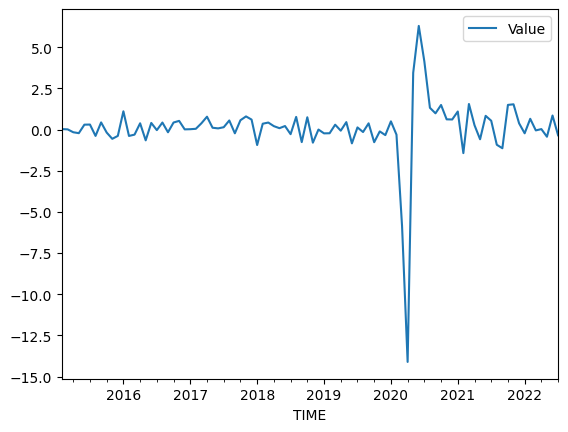

In [40]:
insample.diff()[1:].plot()

#### ACF and PACF Analysis

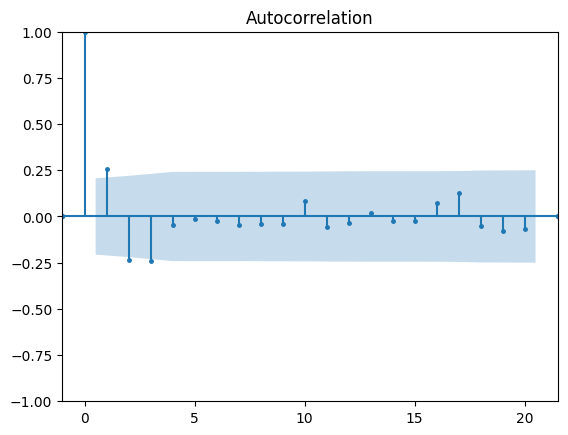

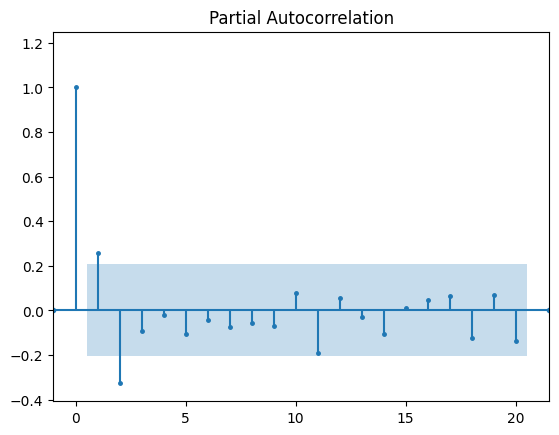

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf = plot_acf(insample.diff()[1:], marker='.')
pacf = plot_pacf(insample.diff()[1:], auto_ylims=True, marker='.')

#### Model Estimation

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

arima_111 = SARIMAX(endog=insample, order=(1,1,1), freq='MS', use_exact_diffuse=True).fit()
arima_111.summary()

c:\Users\vnaza\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                   91
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -182.426
Date:                Thu, 05 Oct 2023   AIC                            372.851
Time:                        23:05:51   BIC                            382.895
Sample:                    01-01-2015   HQIC                           376.903
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1079      0.146     -0.741      0.458      -0.393       0.177
ma.L1          0.4639      0.160      2.893      0.004       0.150       0.778
sigma2         3.3000      0.146     22.628      0.000       3.014       3.586
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2298.39
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              46.22   Skew:                            -2.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""


=========== Ljung-Box ===========
Ljung-Box Test Statistic: 15.155584769328957
Ljung-Box p-value: 0.7674368439292433
=========== Jarque-Bera ===========
Jarque Bera Test Statistic: 2298.3887596675145
Jarque Bera p-value: 0.0


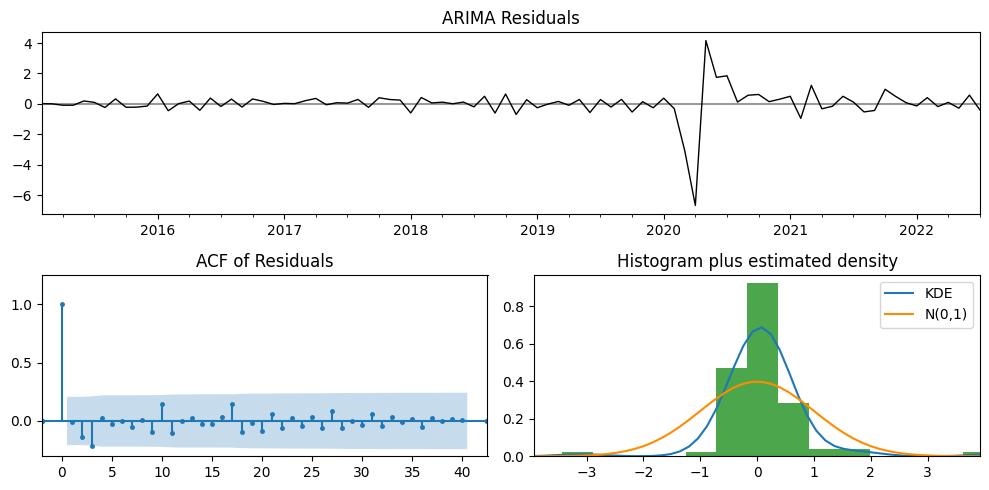

In [43]:
from utils import checkresiduals
checkresiduals(arima_111)

In [44]:
arima_213 = SARIMAX(endog=insample, order=(2,1,3), freq='MS', use_exact_diffuse=True).fit()
arima_213.summary()

c:\Users\vnaza\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                   91
Model:               SARIMAX(2, 1, 3)   Log Likelihood                -177.808
Date:                Thu, 05 Oct 2023   AIC                            369.615
Time:                        23:05:52   BIC                            387.192
Sample:                    01-01-2015   HQIC                           376.706
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1109      0.301     -0.369      0.712      -0.700       0.478
ar.L2          0.6561      0.358      1.835      0.067      -0.045       1.357
ma.L1          0.3890      1.475      0.264      0.792      -2.501       3.279
ma.L2         -0.8896      1.867     -0.476      0.634      -4.549       2.770
ma.L3         -0.4957      0.669     -0.741      0.458      -1.806       0.815
sigma2         2.8951      3.876      0.747      0.455      -4.701      10.491
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              3856.53
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):              33.11   Skew:                            -4.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""


=========== Ljung-Box ===========
Ljung-Box Test Statistic: 11.1101495665719
Ljung-Box p-value: 0.9433158220444118
=========== Jarque-Bera ===========
Jarque Bera Test Statistic: 3856.526127971345
Jarque Bera p-value: 0.0


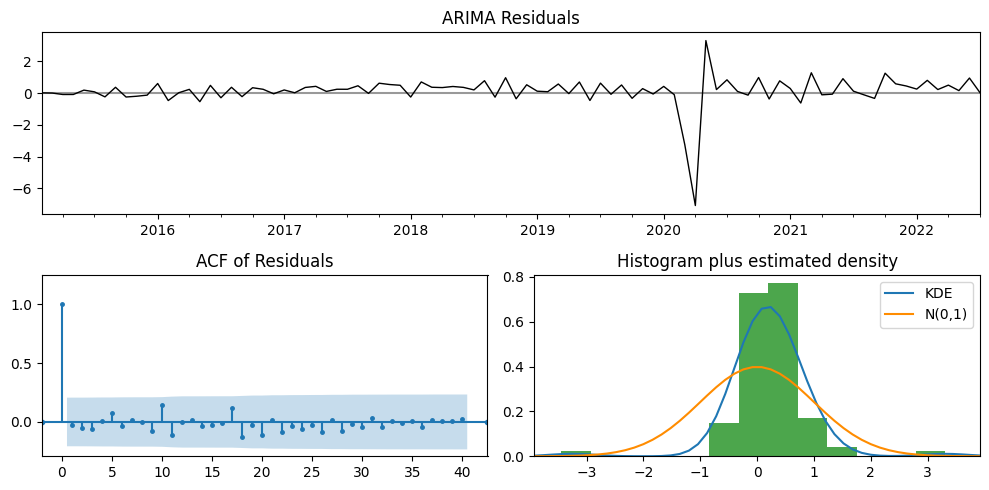

In [45]:
checkresiduals(arima_213)

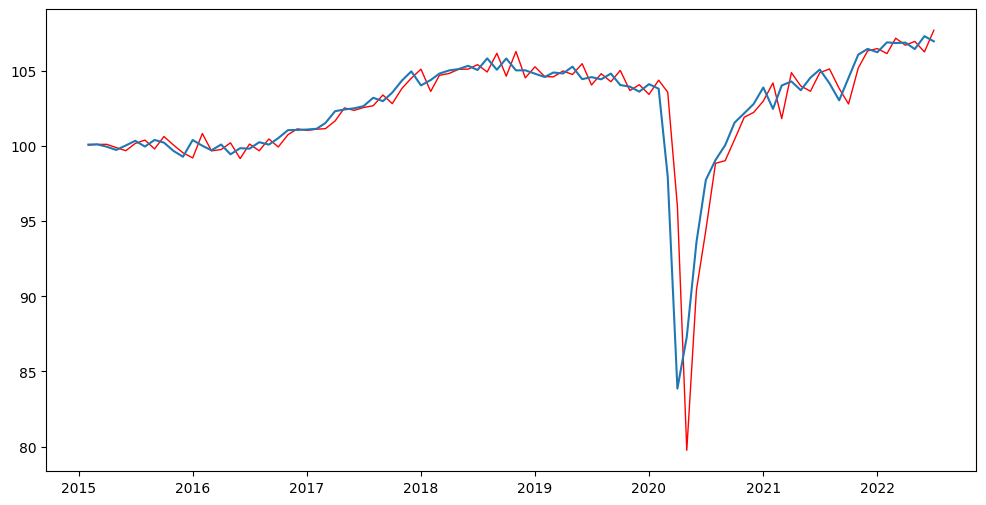

In [46]:
plt.figure(figsize=(12,6))
plt.plot(arima_111.predict()[1:], color='red',linewidth=1)
plt.plot(insample[1:])
plt.show()

In [47]:
import pmdarima as pm

auto_search = pm.auto_arima(y=insample,
                           tart_p=1,
                            start_q=1,
                            test='adf',
                            max_p=10, 
                            max_d=9, 
                            max_q=10,
                            error_action='ignore',
                            information_criterion = 'aic',
                            suppress_warnings=True,
                            maxiter=100, 
                            stepwise=True)

arima_auto = SARIMAX(insample,order=auto_search.order, freq='MS',use_exact_diffuse=True).fit()
arima_auto.summary()

c:\Users\vnaza\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                   91
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -179.829
Date:                Thu, 05 Oct 2023   AIC                            367.658
Time:                        23:06:04   BIC                            377.702
Sample:                    01-01-2015   HQIC                           371.710
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3411      0.072      4.747      0.000       0.200       0.482
ar.L2         -0.3194      0.182     -1.760      0.078      -0.675       0.036
sigma2         3.1104      0.212     14.697      0.000       2.696       3.525
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              2806.25
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):              40.76   Skew:                            -3.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""


=========== Ljung-Box ===========
Ljung-Box Test Statistic: 12.224352761055837
Ljung-Box p-value: 0.9081374481649875
=========== Jarque-Bera ===========
Jarque Bera Test Statistic: 2806.253796251043
Jarque Bera p-value: 0.0


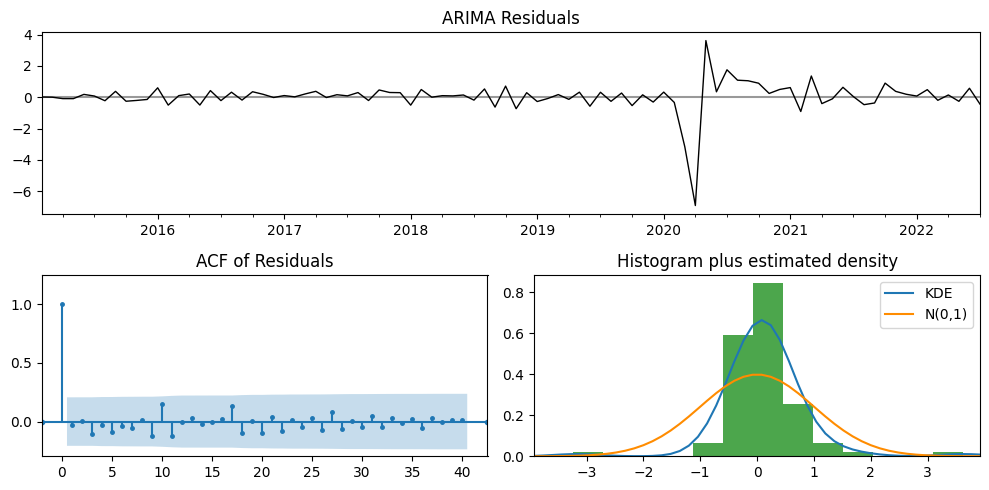

In [48]:
from utils import checkresiduals
checkresiduals(arima_auto)

,Value
Metric,
RMSE,0.441468
MAE,0.380922
MAPE,0.003581


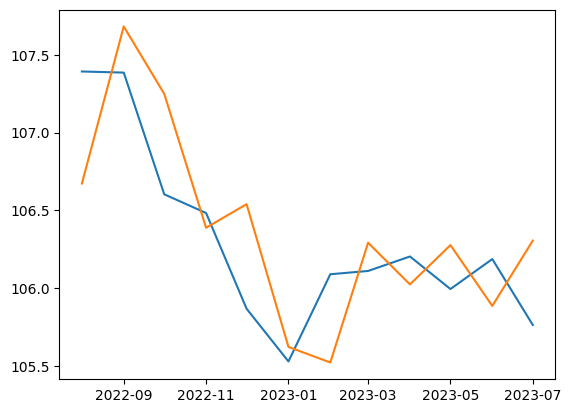

In [58]:
from utils import one_step_arima, metrics

arima_predictions = one_step_arima(arima_111, outsample)

plt.plot(outsample)
plt.plot(outsample.index, arima_predictions)

df_metrics_arima = metrics(outsample, arima_predictions)
df_metrics_arima.set_index('Metric', inplace=True)
df_metrics_arima


,Value
Metric,
RMSE,0.688140
MAE,0.572734
MAPE,0.005379


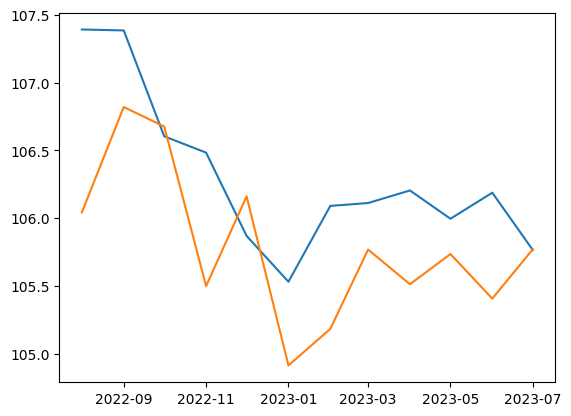

In [53]:
arima_predictions = one_step_arima(arima_211, outsample)

plt.plot(outsample)
plt.plot(outsample.index, arima_predictions)

# df_metrics_arima = metrics(outsample, arima_predictions)
# df_metrics_arima.set_index('Metric', inplace=True)
# df_metrics_arima

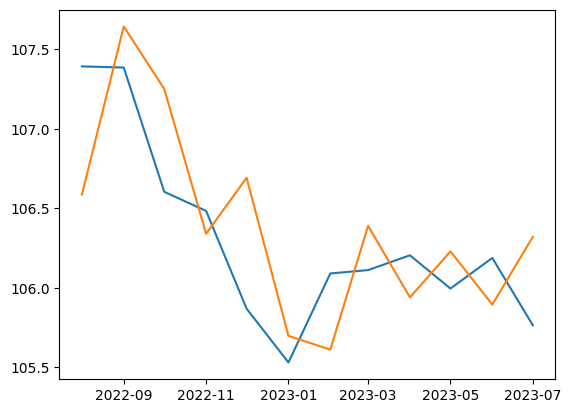

In [59]:
arima_predictions = one_step_arima(arima_auto, outsample)

plt.plot(outsample)
plt.plot(outsample.index, arima_predictions)

# df_metrics_arima = metrics(outsample, arima_predictions)
# df_metrics_arima.set_index('Metric', inplace=True)
# df_metrics_arima

## ANN

##### Feature Engineering

In [19]:
import pandas_ta as ta
industrial_ann = raw_industrial.copy()
lags = 3
industrial_ann.rename(columns={'Value': 'Target'}, inplace=True)

for i in range(1,lags+1):
    industrial_ann[f'Lag_{i}'] = industrial_ann['Target'].shift(i)

industrial_ann.dropna(inplace=True)
industrial_ann

,Target,Lag_1,Lag_2,Lag_3
TIME,,,,
1998-04-01,80.47646,80.53120,80.70535,80.66025
1998-05-01,80.62733,80.47646,80.53120,80.70535
1998-06-01,80.22836,80.62733,80.47646,80.53120
1998-07-01,80.24489,80.22836,80.62733,80.47646
1998-08-01,80.38035,80.24489,80.22836,80.62733
...,...,...,...,...
2023-03-01,106.11160,106.09040,105.53070,105.86910
2023-04-01,106.20450,106.11160,106.09040,105.53070
2023-05-01,105.99550,106.20450,106.11160,106.09040


#### Train Test Split

In [20]:
import torch
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
from utils import Dataset

train = industrial_ann['2015':'2022-07']
test = industrial_ann['2022-08':]

X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]


#### Model Estimation

In [26]:
from skorch.net import NeuralNet
from skorch.callbacks import Checkpoint, EarlyStopping, EpochScoring
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from FeedForwardANN import FeedForwardANN
import torch.nn as nn
from torch.optim import Adam
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

network = FeedForwardANN(input_dim=len(X_test.columns))
net = NeuralNet(network,
    criterion= nn.MSELoss(),
    max_epochs=500,
    lr=0.01,
    batch_size=16,
    callbacks=[Checkpoint(load_best=True)],
    optimizer = Adam,
    )


pipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('net', net),
])

# params = {
#     'net__lr': [0.5, 0.1, 0.01 ,0.001],
#     'net__batch_size': [5,8,16],
#     # 'net__module__h_neuron':[2,3,5,8],
#     # 'net__module__input_dim':[len(X_test.columns)]
# }

gs = pipe.fit(X_train.values.astype('float32'), y_train.values.reshape(-1, 1).astype('float32'))

# gs = GridSearchCV(pipe, params,cv=TimeSeriesSplit(n_splits=3),  scoring='neg_mean_squared_error', verbose=2)

gs.fit(X_train.values.astype('float32'), y_train.values.reshape(-1, 1).astype('float32'))
# gs.best_params_

  epoch    train_loss    valid_loss    cp     dur
-------  ------------  ------------  ----  ------
      1    10544.5803     9825.1856     +  0.0050


      2    10396.6772     9696.3700     +  0.0060
      3    10247.6383     9588.8341     +  0.0050
      4    10122.8168     9476.3467     +  0.0060
      5     9982.9345     9342.1007     +  0.0050
      6     9816.1334     9181.9476     +  0.0060
      7     9617.5723     8991.4918     +  0.0070
      8     9382.1743     8766.1291     +  0.0070
      9     9104.7406     8501.2065     +  0.0070
     10     8780.2081     8192.2837     +  0.0050
     11     8403.8444     7835.5710     +  0.0050
     12     7972.3154     7428.3801     +  0.0060
     13     7483.7890     6969.5854     +  0.0060
     14     6938.6278     6460.1079     +  0.0050
     15     6339.9757     5903.4024     +  0.0050
     16     5694.3055     5305.9009     +  0.0050
     17     5011.8777     4677.3561     +  0.0040
     18     4307.0085     4030.9922     +  0.0040
     19     3598.0203     3383.3487     +  0.0060
     20     2906.6923     2753.6538     +  0.0070
     21     2256.9727     2162.6129     +  0.0040


Pipeline(steps=[('scale', MinMaxScaler()),
                ('net',
                 <class 'skorch.net.NeuralNet'>[initialized](
  module_=FeedForwardANN(
    (network): Sequential(
      (0): Linear(in_features=3, out_features=3, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=3, out_features=3, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=3, out_features=1, bias=True)
    )
  ),
))])

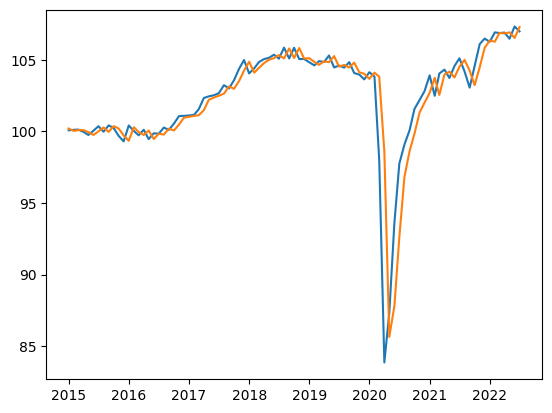

In [27]:
ann_grid_predictions = gs.predict(X_train.values.astype('float32'))

plt.plot(y_train)
plt.plot(y_train.index, ann_grid_predictions)

# df_metrics = metrics(outsample, ann_grid_predictions)
# df_metrics

,Value
Metric,
RMSE,0.405920
MAE,0.331829
MAPE,0.003124


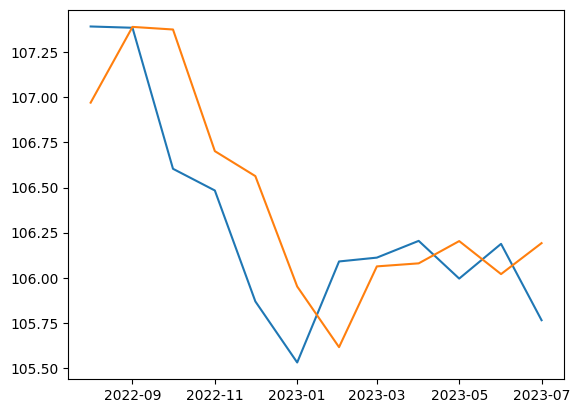

In [61]:
ann_grid_predictions = gs.predict(X_test.values.astype('float32'))

plt.plot(outsample)
plt.plot(outsample.index, ann_grid_predictions)

df_metrics_ann = metrics(outsample, ann_grid_predictions)
df_metrics_ann.set_index('Metric', inplace=True)
df_metrics_ann

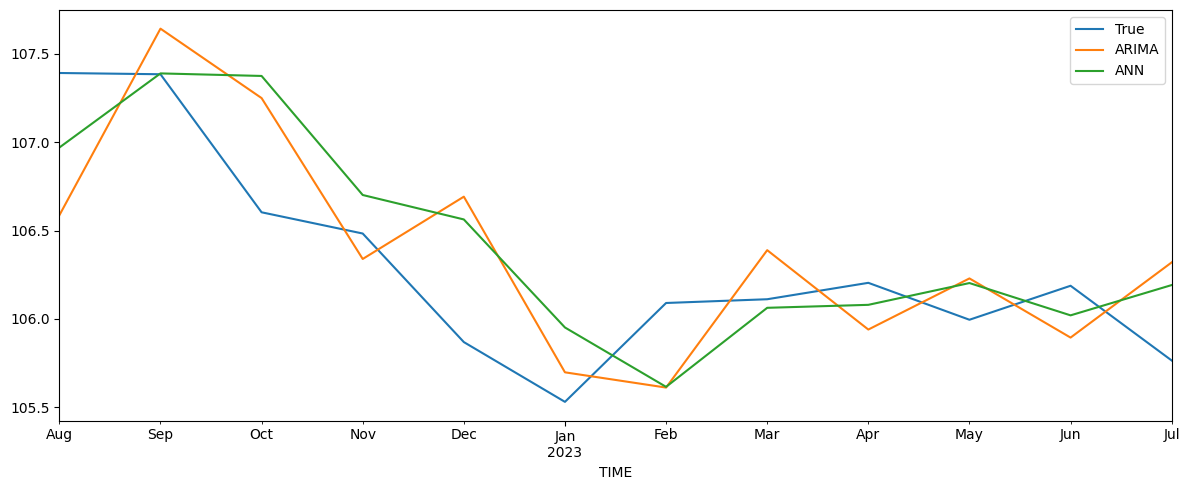

In [30]:
df_predictions = pd.DataFrame({})

df_predictions['True'] = outsample
df_predictions['ARIMA'] = arima_predictions
df_predictions['ANN'] = ann_grid_predictions

df_predictions.plot(figsize=(12, 5))
plt.tight_layout()

In [62]:
df_results = pd.DataFrame({})
df_results['Arima'] = df_metrics_arima
df_results['Ann'] = df_metrics_ann
df_results

,Arima,Ann
Metric,,
RMSE,0.441468,0.405920
MAE,0.380922,0.331829
MAPE,0.003581,0.003124


In [63]:
df_results.to_excel('Metrics.xlsx')
df_predictions.to_excel('Predictions.xlsx')

In [64]:
def dm_test(actual_lst, pred1_lst, pred2_lst, h = 1, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)  
        # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")  
        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True
        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):  
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return (rt,msg)
        return (rt,msg)
    
    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np
    
    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []
    
    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()
    
    # Length of lists (as real numbers)
    T = float(len(actual_lst))
    
    # construct d according to crit
    if (crit == "MSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)    
    
    # Mean of d        
    mean_d = pd.Series(d_lst).mean()
    
    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)
    
    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')
    
    rt = dm_return(DM = DM_stat, p_value = p_value)
    
    return rt

In [65]:
rt = dm_test(df_predictions['True'],df_predictions['ARIMA'],df_predictions['ANN'], h = 1, crit="MSE")
rt

dm_return(DM=1.2269779954804192, p_value=0.2454442448366584)